### MID 16
### Taking ant1.3 as training data.
### ant1.4 as testing data.
### Min max scaling done to few columns: ['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc', 'max_cc', 'avg_cc']
### Oversampling and smote methods used to increase size of training data.
### Selection those features whose info gain > 0.2
### LSTM model used, model type is 1 as per the BTP documentation spreadsheet.
### np.rint() used on predictions

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import time 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential, load_model
from keras.layers import LSTM, Dense
import tensorflow as tf
import csv
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading data. 
train_data_path = "/home/bavanya/Desktop/6thSem/BTP/regression_PROMISE_dataset/datasets/ant-1.3.csv"
test_data_path = "/home/bavanya/Desktop/6thSem/BTP/regression_PROMISE_dataset/datasets/ant-1.4.csv"
train_data_name = "ant-1.3"
test_data_name = "ant-1.4"
ant_1_3 = pd.read_csv(train_data_path)
ant_1_4 = pd.read_csv(test_data_path)
files = ["/home/bavanya/Desktop/6thSem/BTP/regression_PROMISE_dataset/datasets/ant-1.3.csv", "/home/bavanya/Desktop/6thSem/BTP/regression_PROMISE_dataset/datasets/ant-1.4.csv"]
combined_data = pd.concat(map(pd.read_csv, files))

In [3]:
# Applying Min Max Scaling.
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
cols_to_norm = ['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc', 'max_cc', 'avg_cc']
combined_data[cols_to_norm] = MinMaxScaler().fit_transform(combined_data[cols_to_norm])

In [7]:
X = combined_data[cols_to_norm]
y = pd.DataFrame(combined_data['bug'])

In [8]:
X

wmc  dit    noc       cbo       rfc      lcom        ca        ce  \
0    0.142857  0.6  0.050  0.102941  0.214286  0.011856  0.014815  0.428571   
1    0.181818  0.0  0.025  0.058824  0.163265  0.020033  0.029630  0.142857   
2    0.038961  0.2  0.000  0.007353  0.045918  0.000000  0.000000  0.035714   
3    0.155844  0.4  0.000  0.088235  0.188776  0.013083  0.000000  0.428571   
4    0.077922  0.4  0.000  0.029412  0.107143  0.000409  0.000000  0.142857   
..        ...  ...    ...       ...       ...       ...       ...       ...   
173  0.064935  0.4  0.000  0.051471  0.096939  0.001635  0.029630  0.142857   
174  0.220779  0.0  0.075  0.110294  0.336735  0.036795  0.029630  0.428571   
175  0.298701  0.0  0.000  0.227941  0.418367  0.082175  0.162963  0.964286   
176  0.142857  0.0  0.200  0.161765  0.438776  0.006132  0.059259  0.500000   
177  0.051948  0.2  0.000  0.022059  0.081633  0.000000  0.000000  0.107143   

          npm     lcom3       loc       dam       moa       mfa       cam  \
0    0.073529  0.362500  0.180119  1.000000  0.111111  0.885057  0.232323   
1    0.176471  0.417582  0.117191  1.000000  0.000000  0.000000  0.307692   
2    0.014706  0.000000  0.026448  1.000000  0.111111  0.714286  0.666667   
3    0.176471  0.429293  0.141359  1.000000  0.111111  0.770833  0.458333   
4    0.088235  0.350000  0.062016  1.000000  0.000000  0.880952  0.416667   
..        ...       ...       ...       ...       ...       ...       ...   
173  0.058824  0.375000  0.068855  0.000000  0.000000  0.902439  0.400000   
174  0.088235  0.395833  0.287278  1.000000  0.222222  0.000000  0.197917   
175  0.250000  0.446970  0.498404  0.444444  0.000000  0.000000  0.318182   
176  0.058824  0.364286  0.404469  1.000000  0.777778  0.000000  0.266667   
177  0.058824  0.166667  0.026904  1.000000  0.000000  0.842105  0.875000   

       ic       cbm       amc    max_cc    avg_cc  
0    0.75  0.363636  0.165951  0.085714  0.209085  
1    0.00  0.000000  0.080979  0.171429  0.269903  
2    0.25  0.090909  0.083267  0.028571  0.109529  
3    0.00  0.000000  0.115693  0.085714  0.232742  
4    0.50  0.181818  0.100881  0.028571  0.136898  
..    ...       ...       ...       ...       ...  
173  0.25  0.090909  0.138351  0.028571  0.131428  
174  0.00  0.000000  0.172373  0.400000  0.396221  
175  0.00  0.000000  0.219724  0.685714  0.378561  
176  0.00  0.000000  0.373390  0.628571  0.761689  
177  0.25  0.090909  0.064852  0.142857  0.287498  

[303 rows x 20 columns]

In [9]:
y

bug
0      0
1      2
2      0
3      0
4      0
..   ...
173    0
174    0
175    0
176    1
177    0

[303 rows x 1 columns]

/home/bavanya/Downloads/deb_packages/home/bavanya/Desktop/venv_python/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


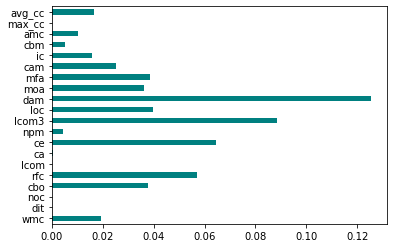

In [12]:
importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [18]:
info_gains = feat_importances.to_list()
columns = X.columns.to_list()

In [21]:
selected_features = []
for i in range(len(info_gains)):
    if(info_gains[i]>0.02):
        selected_features.append(columns[i])
selected_features

['cbo', 'rfc', 'ce', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam']

In [22]:
ant_1_3_scaled = combined_data[combined_data['version'] == 1.3] 
ant_1_4_scaled = combined_data[combined_data['version'] == 1.4] 

In [26]:
# Getting training and test data.
X_train = ant_1_3_scaled[selected_features]
X_train = np.array(X_train)
Y_train = ant_1_3['bug']

X_test = ant_1_4_scaled[selected_features]
X_test = np.array(X_test)
Y_test = ant_1_4['bug']

In [27]:
# Applying over sampling and SMOTE to training data for augmentation.
ros = RandomOverSampler(random_state=0)
X_train, Y_train = ros.fit_resample(X_train, Y_train)

smt = SMOTE()
X_train, Y_train = smt.fit_resample(X_train, Y_train)

train_x = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
test_x = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [28]:
train_x 

array([[[0.10294118, 0.21428571, 0.42857143, ..., 0.11111111,
         0.88505747, 0.23232323]],

       [[0.05882353, 0.16326531, 0.14285714, ..., 0.        ,
         0.        , 0.30769231]],

       [[0.00735294, 0.04591837, 0.03571429, ..., 0.11111111,
         0.71428571, 0.66666667]],

       ...,

       [[0.13970588, 0.37244898, 0.25      , ..., 0.11111111,
         0.        , 0.17045455]],

       [[0.13970588, 0.37244898, 0.25      , ..., 0.11111111,
         0.        , 0.17045455]],

       [[0.07352941, 0.16836735, 0.28571429, ..., 0.11111111,
         0.88095238, 0.33333333]]])

In [29]:
Y_train

0      0
1      2
2      0
3      0
4      0
      ..
415    3
416    3
417    3
418    3
419    3
Name: bug, Length: 420, dtype: int64

In [30]:
train_y = Y_train.to_numpy()
train_y

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [31]:
test_x

array([[[0.05882353, 0.20918367, 0.28571429, ..., 0.22222222,
         0.74      , 0.35714286]],

       [[0.06617647, 0.21938776, 0.32142857, ..., 0.        ,
         0.90243902, 0.53333333]],

       [[0.05882353, 0.10204082, 0.07142857, ..., 0.        ,
         0.        , 0.61538461]],

       ...,

       [[0.22794118, 0.41836735, 0.96428571, ..., 0.        ,
         0.        , 0.31818182]],

       [[0.16176471, 0.43877551, 0.5       , ..., 0.77777778,
         0.        , 0.26666667]],

       [[0.02205882, 0.08163265, 0.10714286, ..., 0.        ,
         0.84210526, 0.875     ]]])

In [32]:
Y_test

0      0
1      0
2      0
3      0
4      0
      ..
173    0
174    0
175    0
176    1
177    0
Name: bug, Length: 178, dtype: int64

In [33]:
test_y = Y_test.to_numpy()
test_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0])

In [36]:
# Designing and initializing the model.
model = Sequential()
model.add(LSTM(100, input_shape = (1,len(selected_features)), dropout = 0.2, return_sequences=True))
model.add(LSTM(80, dropout = 0.2, return_sequences=True))
model.add(LSTM(60, dropout = 0.2, return_sequences=False))
model.add(Dense(1, activation = 'relu'))
model.compile(loss = 'mse' , optimizer = 'adam' , metrics = ['mse', 'mae', tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanSquaredLogarithmicError()] )

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 100)            44000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 80)             57920     
_________________________________________________________________
lstm_5 (LSTM)                (None, 60)                33840     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 61        
Total params: 135,821
Trainable params: 135,821
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Fitting the model on training data.
history = model.fit(train_x, train_y, epochs = 100, batch_size = 128)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 3.4840 - mse: 3.4840 - mae: 1.4971 - root_mean_squared_error: 1.8666 - mean_squared_logarithmic_error: 0.8938
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 3.4170 - mse: 3.4170 - mae: 1.4857 - root_mean_squared_error: 1.8485 - mean_squared_logarithmic_error: 0.8593
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 3.3323 - mse: 3.3323 - mae: 1.4714 - root_mean_squared_error: 1.8255 - mean_squared_logarithmic_error: 0.8176
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 3.2125 - mse: 3.2125 - mae: 1.4492 - root_mean_squared_error: 1.7923 - mean_squared_logarithmic_error: 0.7616
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 3.0405 - mse: 3.0405 - mae: 1.4166 - root_mean_squared_error: 1.7437 - mean_squared_logarithmic_error: 0.6874
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 2.8158 - mse: 2.8158 - m

4/4 [==============================] - 0s 4ms/step - loss: 1.1758 - mse: 1.1758 - mae: 0.9489 - root_mean_squared_error: 1.0843 - mean_squared_logarithmic_error: 0.2537
Epoch 46/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1196 - mse: 1.1196 - mae: 0.9229 - root_mean_squared_error: 1.0581 - mean_squared_logarithmic_error: 0.2457
Epoch 47/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0586 - mse: 1.0586 - mae: 0.9063 - root_mean_squared_error: 1.0289 - mean_squared_logarithmic_error: 0.2320
Epoch 48/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1025 - mse: 1.1025 - mae: 0.9271 - root_mean_squared_error: 1.0500 - mean_squared_logarithmic_error: 0.2444
Epoch 49/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0455 - mse: 1.0455 - mae: 0.8960 - root_mean_squared_error: 1.0225 - mean_squared_logarithmic_error: 0.2334
Epoch 50/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1392 - mse: 1.1392 - mae: 0.9

4/4 [==============================] - 0s 3ms/step - loss: 0.9927 - mse: 0.9927 - mae: 0.8447 - root_mean_squared_error: 0.9963 - mean_squared_logarithmic_error: 0.2230
Epoch 91/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0288 - mse: 1.0288 - mae: 0.8633 - root_mean_squared_error: 1.0143 - mean_squared_logarithmic_error: 0.2288
Epoch 92/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0013 - mse: 1.0013 - mae: 0.8449 - root_mean_squared_error: 1.0006 - mean_squared_logarithmic_error: 0.2194
Epoch 93/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9869 - mse: 0.9869 - mae: 0.8620 - root_mean_squared_error: 0.9934 - mean_squared_logarithmic_error: 0.2129
Epoch 94/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9836 - mse: 0.9836 - mae: 0.8598 - root_mean_squared_error: 0.9917 - mean_squared_logarithmic_error: 0.2134
Epoch 95/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0348 - mse: 1.0348 - mae: 0.8

In [39]:
# Getting the predictions.
predictions_y = model.predict(test_x)
predictions_y

array([[1.5266638 ],
       [1.6398585 ],
       [1.0329347 ],
       [1.6407385 ],
       [1.7578658 ],
       [1.4561362 ],
       [1.298614  ],
       [0.285609  ],
       [1.4547267 ],
       [1.7338958 ],
       [1.698586  ],
       [2.0753741 ],
       [1.3672768 ],
       [1.5210793 ],
       [1.6720438 ],
       [0.721822  ],
       [1.7031038 ],
       [1.2291226 ],
       [0.45440385],
       [1.5100524 ],
       [1.2525826 ],
       [0.8295624 ],
       [0.9617512 ],
       [1.7512637 ],
       [1.6934894 ],
       [1.6721065 ],
       [1.7920204 ],
       [1.1214094 ],
       [1.3582361 ],
       [0.2954177 ],
       [0.15207975],
       [0.68273485],
       [0.6423472 ],
       [1.4268255 ],
       [1.5084908 ],
       [0.18078679],
       [1.1268675 ],
       [0.9551548 ],
       [1.0836941 ],
       [1.0414342 ],
       [1.5056789 ],
       [0.        ],
       [0.00388938],
       [1.6836367 ],
       [0.16571218],
       [0.88868046],
       [1.9314911 ],
       [1.677

In [40]:
# Rounding off the predictions to nearest
#integer as count of bugs is an integer.
predictions_y_round = np.rint(predictions_y)
predictions_y_round 

array([[2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [0.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],

In [41]:
# Viewing the number of predictions.
predictions_y_round.shape

(178, 1)

In [42]:
# Getting the sum of all the predictions obtained to used while obtaining FPA
s = 0
for  t in range(predictions_y_round.shape[0]):
    s+=predictions_y_round[t]
s

array([223.], dtype=float32)

In [43]:
# Obtaining the value of FPA metric for the model
Fpa = 0
for  t in range(predictions_y_round.shape[0]):
        x = 0
        for j in range( predictions_y_round.shape[0]-t+1, predictions_y_round.shape[0]):
               x = x + predictions_y_round[j]
        
        x = (x/s)/predictions_y_round.shape[0]
        Fpa = Fpa + x
Fpa

array([0.48584172], dtype=float32)

In [44]:
# Obtaining the value of CLC metric for the model
previous_obtained = predictions_y_round[predictions_y_round.shape[0] - 1]/s

CLC = 0
for i in range(predictions_y_round.shape[0]):
    if(i==0):
        CLC += 0 + previous_obtained
    else:
        additional = (predictions_y_round[predictions_y_round.shape[0] - 1 - i])/s
        CLC += 2*previous_obtained + additional
        previous_obtained += additional
        
CLC/=(2*predictions_y_round.shape[0])
CLC

array([0.494218], dtype=float32)

In [45]:
# Getting direct metric results using the metrics given to model.
score = model.evaluate(test_x, test_y)
print(history.history.keys())
model.test_on_batch(test_x, test_y)
model.metrics_names
#print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[2], score[2]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[3], score[3]*100))


6/6 [==============================] - 0s 2ms/step - loss: 1.4210 - mse: 1.4210 - mae: 1.0526 - root_mean_squared_error: 1.1921 - mean_squared_logarithmic_error: 0.5198
dict_keys(['loss', 'mse', 'mae', 'root_mean_squared_error', 'mean_squared_logarithmic_error'])


['loss',
 'mse',
 'mae',
 'root_mean_squared_error',
 'mean_squared_logarithmic_error']

In [46]:
# Saving the model
model_id = 16
path_to_save = '/home/bavanya/Desktop/6thSem/BTP/regression_PROMISE_dataset/saved_models/ant1.3_ant1.4_model1/ant1.3_ant1.4_model1_4'
model.save(path_to_save)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /home/bavanya/Desktop/6thSem/BTP/regression_PROMISE_dataset/saved_models/ant1.3_ant1.4_model1/ant1.3_ant1.4_model1_4/assets


In [47]:
# Writing the results to csv file.
heading = ['model_id', 'train_data_name', 'test_data_name'] + model.metrics_names + ['fpa', 'clc']
score = [model_id, train_data_name, test_data_name] + score + [float(Fpa) , float(CLC)]

In [48]:
heading

['model_id',
 'train_data_name',
 'test_data_name',
 'loss',
 'mse',
 'mae',
 'root_mean_squared_error',
 'mean_squared_logarithmic_error',
 'fpa',
 'clc']

In [49]:
score

[16,
 'ant-1.3',
 'ant-1.4',
 1.4210377931594849,
 1.4210377931594849,
 1.052568793296814,
 1.192072868347168,
 0.5198023915290833,
 0.4858417212963104,
 0.49421799182891846]

In [50]:
# Writing the results to csv file.
with open(path_to_save + '_metric_results.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(heading)
    writer.writerow(score)


In [51]:
# Loading the model and to make sure that the model is saved properly.
model_loaded = load_model(path_to_save)